# Importing libraries and Global School dropouts UNICEF dataset

# Data Extraction 

In [1]:
%matplotlib inline

In [2]:
from numpy import arange
import numpy
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [3]:
plt.rcParams['figure.figsize'] = [16, 7] 

All columns represent the dropout rates of pupils based on different parameters

In [4]:
columns=['Region','UNICEF Sub-region 1','Development Regions','Female','Male','Rural','Urban','Poorest','Poor','Middle Segment',
         'Rich','Richest','Data Source','Time Period','Educational Level','Total Dropout']
df = pd.read_csv(r"C:/Users/Aadya/Desktop/Global_school_dropouts_UNICEF.csv")

In [5]:
df.columns = columns
df.head()

,Region,UNICEF Sub-region 1,Development Regions,Female,Male,Rural,Urban,Poorest,Poor,Middle Segment,Rich,Richest,Data Source,Time Period,Educational Level,Total Dropout
0,SA,SA,Least Developed,47.0,28.0,42.0,19.0,42.0,47.0,46.0,32.0,16.0,DHS 2015,2015.0,Primary,37.0
1,ECA,EECA,More Developed,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,DHS 2017-18,2018.0,Primary,2.0
2,MENA,MENA,Less Developed,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,MICS 2012-13,2013.0,Primary,2.0
3,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primary,NaN
4,SSA,ESA,Least Developed,22.0,21.0,35.0,14.0,39.0,33.0,19.0,12.0,5.0,DHS 2015-16,2016.0,Primary,22.0


Removing the first row of the dataset. It will be used later.

In [6]:
#Original dataframe
df.head(2)

,Region,UNICEF Sub-region 1,Development Regions,Female,Male,Rural,Urban,Poorest,Poor,Middle Segment,Rich,Richest,Data Source,Time Period,Educational Level,Total Dropout
0,SA,SA,Least Developed,47.0,28.0,42.0,19.0,42.0,47.0,46.0,32.0,16.0,DHS 2015,2015.0,Primary,37.0
1,ECA,EECA,More Developed,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,DHS 2017-18,2018.0,Primary,2.0


In [7]:
#Removing the first row from the dataframe
row = df.iloc[-1]
#print(row)
row=list(row)
print(row)

['SSA', 'ESA', 'Less Developed', 54.0, 48.0, 55.0, 43.0, 63.0, 54.0, 52.0, 49.0, 38.0, 'MICS 2019', 2019.0, 'Upper secondary', 51.0]


In [8]:
#Removing first row from the dataframe
df = df.drop([0],axis=0)

In [9]:
#First row of the new dataframe
df.head(1)

,Region,UNICEF Sub-region 1,Development Regions,Female,Male,Rural,Urban,Poorest,Poor,Middle Segment,Rich,Richest,Data Source,Time Period,Educational Level,Total Dropout
1,ECA,EECA,More Developed,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,DHS 2017-18,2018.0,Primary,2.0


# Data Exploration

In [10]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 1 to 605
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               599 non-null    object 
 1   UNICEF Sub-region 1  599 non-null    object 
 2   Development Regions  605 non-null    object 
 3   Female               329 non-null    float64
 4   Male                 329 non-null    float64
 5   Rural                321 non-null    float64
 6   Urban                321 non-null    float64
 7   Poorest              305 non-null    float64
 8   Poor                 305 non-null    float64
 9   Middle Segment       305 non-null    float64
 10  Rich                 305 non-null    float64
 11  Richest              305 non-null    float64
 12  Data Source          329 non-null    object 
 13  Time Period          329 non-null    float64
 14  Educational Level    605 non-null    object 
 15  Total Dropout        329 non-null    flo

In [11]:
#Data types of the dataset columns
df.dtypes

Region                  object
UNICEF Sub-region 1     object
Development Regions     object
Female                 float64
Male                   float64
Rural                  float64
Urban                  float64
Poorest                float64
Poor                   float64
Middle Segment         float64
Rich                   float64
Richest                float64
Data Source             object
Time Period            float64
Educational Level       object
Total Dropout          float64
dtype: object

In [12]:
#Memory used by each column in the dataset
df.memory_usage()

Index                  4840
Region                 4840
UNICEF Sub-region 1    4840
Development Regions    4840
Female                 4840
Male                   4840
Rural                  4840
Urban                  4840
Poorest                4840
Poor                   4840
Middle Segment         4840
Rich                   4840
Richest                4840
Data Source            4840
Time Period            4840
Educational Level      4840
Total Dropout          4840
dtype: int64

In [13]:
#Total memory used by the dataset
df.memory_usage().sum()

82280

# Data Visualization

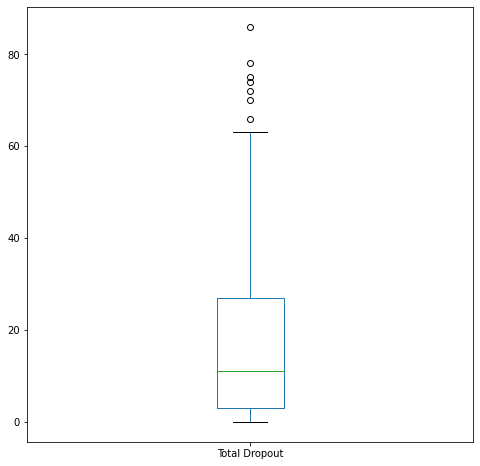

In [14]:
#Boxplot
df['Total Dropout'].plot.box(figsize=(8, 8));

<AxesSubplot:>

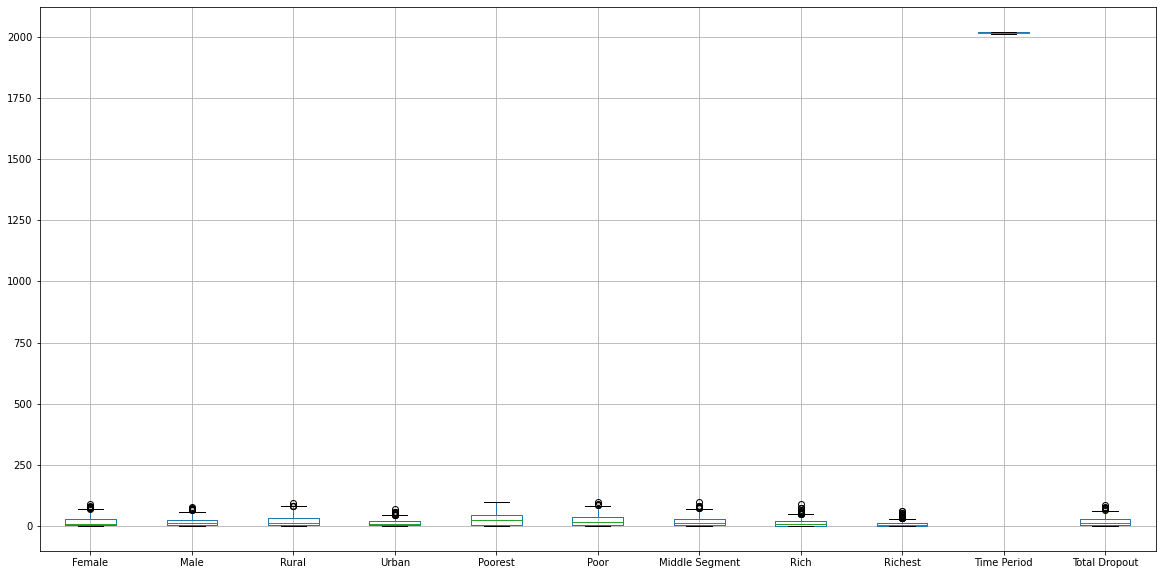

In [15]:
#Boxplot of all the columns with numerical data
df.boxplot(figsize=(20,10))

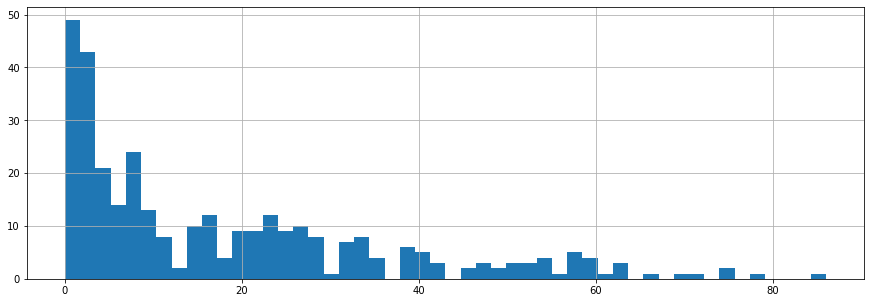

In [16]:
#Histogram
df['Total Dropout'].hist(bins=50, figsize=(15, 5));

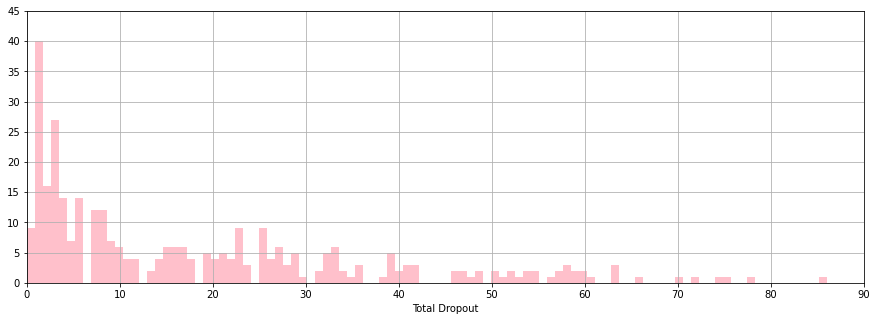

In [17]:
#Histogram with specifications
ax = df['Total Dropout'].hist(bins=100, color='pink', figsize=(15, 5))
ax.set_xlabel('Total Dropout')
ax.set_xlim(0,90) #limiting display range to 0-90 for the x-axis
ax.set_ylim(0,45); #limiting display range to 0-45 for the y-axis

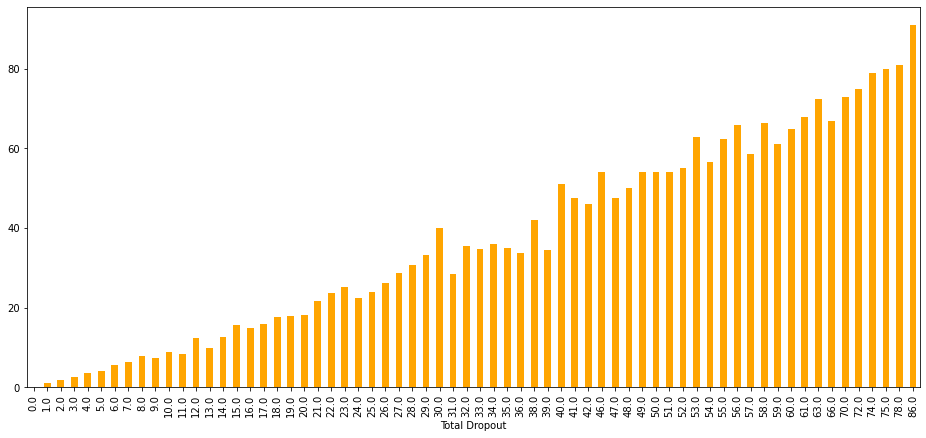

In [18]:
#Barplot with Female dropout as dependent variable
df_avg_female = df.groupby('Total Dropout')['Female'].mean()
df_avg_female[:].plot.bar(color='orange');

# Data Cleaning

In [19]:
#Check if there are missing values in the dataset
df.isnull().sum().sum()

3460

In [20]:
#Removing null values from the dataset
df=df.dropna()

In [21]:
#Recheck if there are missing values in the dataset
df.isnull().sum().sum()

0

In [22]:
#Check if there are duplicate rows in the dataset
df.duplicated().sum()

0

In [23]:
#No. of rows in the dataset after cleaning
print(len(df.axes[0]))

302


# Label encoding columns having non-integer values

In [24]:
df['Region'].replace({'SA':0,'ECA':1,'MENA':2,'SSA':3,'LAC':4,'EAP':5,'NA':6},inplace=True)

In [25]:
df['UNICEF Sub-region 1'].replace({'SA':0,'EECA':1,'MENA':2,'WE':3,'ESA':4,'LAC':5,'EAP':6,'WCA':7,'NA':8},inplace=True)

In [26]:
df['Development Regions'].replace({'Not Classified':0,'Least Developed':1,'Less Developed':2,'More Developed':3},inplace=True)

In [27]:
df['Data Source'].replace({'DHS 2015':0,'DHS 2017-18':1,'MICS 2012-13':2,'DHS 2015-16':3,'MICS 2011-12':4,'MICS 2019':5,
                          'MICS 2012':6,'MICS 2015-16':7,'MICS 2010':8,'Botswana Demographic Survey 2017':9,'PNAD 2019':10,
                          'DHS 2010':11,'DHS 2016-17':12,'DHS 2014':13,'DHS 2018':14,'DHS 2014-15':15,'CASEN 2017':16,
                          'National Population Sample Survey 2015':17,'DHS 2012':18,'MICS 2014-15':19,'MICS 2018':20,
                          'MICS 2016':21,'MICS 2017':22,'MICS 2017-18':23,'MICS 2014':24,'GEPH-ENEMDU-DICIEMBRE - 2019':25,
                          'DHS 2016-17':26,'DHS 2013':27,'MICS 2018-19':28,'Encuesta Permanente de Hogares 2018':29,
                          'National Socio-Economic Survey 2018':30,'MICS 2011':31,'MICS 2015':32,'ENIGH 2018':33,'DHS 2011':34,
                          'Population and Housing Census 2011':35,'MICS 2013':36,'DHS 2017':37,'DHS 2019':38,'DHS 2016':39,
                           'DHS style 2013':40,'Institute of Educational Sciences and UNICEF 2015-2016':41,'DHS 2015':42,
                          'Encuesta Permanente de Hogares 2017':43},
                          inplace=True)

In [28]:
df['Educational Level'].replace({'Primary':0,'Lower secondary':1,'Upper secondary':2},inplace=True)

In [29]:
df.head()

,Region,UNICEF Sub-region 1,Development Regions,Female,Male,Rural,Urban,Poorest,Poor,Middle Segment,Rich,Richest,Data Source,Time Period,Educational Level,Total Dropout
1,1,1,3,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,1,2018.0,0,2.0
2,2,2,2,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,2,2013.0,0,2.0
4,3,4,1,22.0,21.0,35.0,14.0,39.0,33.0,19.0,12.0,5.0,3,2016.0,0,22.0
7,4,5,2,1.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,4,2012.0,0,1.0
8,1,1,2,4.0,5.0,6.0,3.0,6.0,7.0,6.0,3.0,2.0,3,2016.0,0,5.0


In [30]:
#Statistics for all the dataset columns
df.describe()

,Region,UNICEF Sub-region 1,Development Regions,Female,Male,Rural,Urban,Poorest,Poor,Middle Segment,Rich,Richest,Data Source,Time Period,Educational Level,Total Dropout
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,2.821192,4.185430,1.675497,19.930464,18.370861,22.874172,13.473510,29.771523,23.135762,19.139073,14.682119,9.357616,19.162252,2015.473510,0.996689,19.182119
std,1.393321,2.321083,0.615953,20.900932,17.409134,22.069448,13.822473,25.967091,23.295832,20.807787,17.465817,12.121941,11.737586,2.582389,0.817168,18.933086
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2010.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,4.000000,4.000000,3.000000,6.000000,3.250000,3.000000,2.000000,1.000000,7.250000,2014.000000,0.000000,3.000000
50%,3.000000,5.000000,2.000000,12.500000,14.000000,16.000000,9.000000,24.000000,15.000000,11.000000,7.000000,4.000000,20.000000,2016.000000,1.000000,13.500000
75%,4.000000,6.000000,2.000000,30.750000,27.750000,35.750000,20.000000,46.750000,36.000000,29.000000,21.000000,13.000000,27.000000,2018.000000,2.000000,28.750000
max,5.000000,7.000000,3.000000,91.000000,79.000000,95.000000,70.000000,99.000000,97.000000,97.000000,92.000000,63.000000,43.000000,2019.000000,2.000000,86.000000


In [31]:
#Variance
df.var()

Region                   1.941343
UNICEF Sub-region 1      5.387428
Development Regions      0.379398
Female                 436.848969
Male                   303.077952
Rural                  487.060527
Urban                  191.060758
Poorest                674.289818
Poor                   542.695793
Middle Segment         432.963983
Rich                   305.054762
Richest                146.941453
Data Source            137.770929
Time Period              6.668731
Educational Level        0.667763
Total Dropout          358.461739
dtype: float64

In [32]:
#Skewness
df.skew()

Region                -0.441176
UNICEF Sub-region 1   -0.435417
Development Regions    0.336217
Female                 1.195539
Male                   1.109291
Rural                  0.965717
Urban                  1.398729
Poorest                0.708961
Poor                   1.026683
Middle Segment         1.304636
Rich                   1.620148
Richest                1.966928
Data Source            0.138877
Time Period           -0.399372
Educational Level      0.006109
Total Dropout          1.139648
dtype: float64

In [33]:
#Kurtosis
df.kurtosis()

Region                -0.506458
UNICEF Sub-region 1   -1.092629
Development Regions   -0.652230
Female                 0.583931
Male                   0.623715
Rural                  0.033932
Urban                  1.610341
Poorest               -0.575796
Poor                   0.146258
Middle Segment         1.026929
Rich                   2.248416
Richest                3.859236
Data Source           -0.955609
Time Period           -0.942130
Educational Level     -1.502421
Total Dropout          0.596511
dtype: float64

# Feature Selection

In [34]:
#Column-wise correlation in the dataset
df.corr()

,Region,UNICEF Sub-region 1,Development Regions,Female,Male,Rural,Urban,Poorest,Poor,Middle Segment,Rich,Richest,Data Source,Time Period,Educational Level,Total Dropout
Region,1.000000,0.803352,-0.242034,0.051023,0.113273,0.089913,0.073412,0.086192,0.076595,0.073512,0.073834,0.059465,0.169983,0.003296,-0.006358,0.082469
UNICEF Sub-region 1,0.803352,1.000000,-0.420205,0.314189,0.328479,0.359825,0.264417,0.338213,0.331933,0.320295,0.307955,0.252330,0.170712,-0.008046,-0.003178,0.326652
Development Regions,-0.242034,-0.420205,1.000000,-0.540846,-0.530614,-0.537997,-0.473950,-0.530579,-0.553056,-0.538227,-0.521943,-0.476969,-0.125495,-0.022131,-0.008742,-0.543598
Female,0.051023,0.314189,-0.540846,1.000000,0.942020,0.978000,0.938331,0.955428,0.979814,0.980997,0.959708,0.907020,0.011002,-0.084330,0.433953,0.987846
Male,0.113273,0.328479,-0.530614,0.942020,1.000000,0.967262,0.941299,0.955686,0.968438,0.965511,0.945611,0.891424,0.011085,-0.032518,0.455940,0.982224
Rural,0.089913,0.359825,-0.537997,0.978000,0.967262,1.000000,0.925329,0.979225,0.988447,0.973776,0.938247,0.870049,0.017650,-0.049666,0.457573,0.987797
Urban,0.073412,0.264417,-0.473950,0.938331,0.941299,0.925329,1.000000,0.900580,0.927209,0.942868,0.945571,0.949493,0.008391,-0.034224,0.538688,0.954104
Poorest,0.086192,0.338213,-0.530579,0.955428,0.955686,0.979225,0.900580,1.000000,0.973056,0.939404,0.888807,0.826003,-0.007606,-0.026225,0.465593,0.969637
Poor,0.076595,0.331933,-0.553056,0.979814,0.968438,0.988447,0.927209,0.973056,1.000000,0.977809,0.939863,0.871761,0.004670,-0.071428,0.443652,0.989130
Middle Segment,0.073512,0.320295,-0.538227,0.980997,0.965511,0.973776,0.942868,0.939404,0.977809,1.000000,0.974965,0.908715,0.010164,-0.100464,0.450004,0.988436


In [35]:
#Import seaborn library
import seaborn as sns

Kendall correlation

<AxesSubplot:>

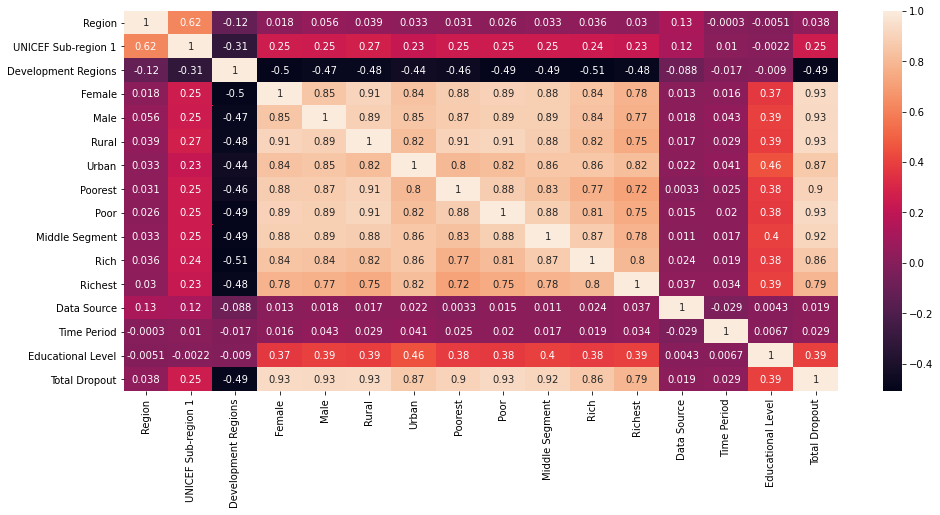

In [36]:
sns.heatmap(df.corr('kendall'),annot=True)

Pearson, Spearman and Kendall correlations give similar results.

Target column: Total Dropout

Columns: Region, UNICEF Sub-region 1, Development Regions, Data Source, Time Period, Educational Level are not well correlated with the target column Total Dropout.

Thus, they are dropped.

In [37]:
df=df.drop(['Region','UNICEF Sub-region 1','Development Regions','Data Source','Time Period','Educational Level'],axis=1)

In [38]:
df.replace('', numpy.nan, inplace=True)

In [39]:
df.dropna(inplace=True)

In [40]:
df.head()

,Female,Male,Rural,Urban,Poorest,Poor,Middle Segment,Rich,Richest,Total Dropout
1,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,2.0
2,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0
4,22.0,21.0,35.0,14.0,39.0,33.0,19.0,12.0,5.0,22.0
7,1.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,1.0
8,4.0,5.0,6.0,3.0,6.0,7.0,6.0,3.0,2.0,5.0


# Data Splitting and Model Building (Multiple Linear regression)

In [41]:
X = df.iloc[:, :-1]
y = df['Total Dropout']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [44]:
y_pred = regressor.predict(X_test)

In [45]:
print(y_pred)

[ 5.65085809e+01  1.98566797e+01  2.38594371e+01  1.88014224e+01
  2.12666582e+01  8.95956449e+00  8.08405528e+00  3.56249450e+00
  2.59385948e+01  6.00315192e+01  1.91092677e+01  2.88559579e+01
  4.18685440e+01  4.97072943e-01  5.99296303e+00  2.26575444e+01
  1.50598537e+00  2.99933724e+00  5.92219507e+00  5.54749170e+00
  1.02135053e+00  3.96013144e+01  2.86388029e+01  1.49798576e+01
  1.42718560e+00  5.37319997e+01  1.71023379e+01  2.60585343e+01
  7.99080806e+00  4.72578008e+01  2.26446909e+01  2.95501978e+01
  6.99973227e+00  2.00626865e+00  4.10242784e+01  4.68147663e+01
  1.45444644e+01  9.86201644e-01  7.48808149e+00  2.67812329e+01
  6.45792045e+00  2.29550465e+01  1.42672425e+00  5.87622554e+01
  5.45160389e+00  5.45622213e+00  2.54353063e+01  1.20294562e+01
  1.96278998e+01  4.50051474e-01  7.22371953e-02  4.49021620e+00
  7.07705014e+00  4.91106840e+01  3.26903196e+01  1.60171239e+01
 -9.17124608e-04  5.10355482e+01  3.00040295e+00  1.92659010e-02
  9.96400025e-01]


In [46]:
print(y_test)

447    56.0
302    20.0
459    24.0
403    19.0
105    22.0
       ... 
293     0.0
605    51.0
55      3.0
218     0.0
182     1.0
Name: Total Dropout, Length: 61, dtype: float64


In [47]:
#Checking the model accuracy
regressor.score(X_test, y_test)

0.9996471691780692

In [48]:
#Co-efficients of the Logistic regression equation
regressor.coef_

array([0.43032422, 0.43661876, 0.02184386, 0.01119668, 0.01934443,
       0.02018303, 0.02411191, 0.01434984, 0.02349589])

In [49]:
#y-intercept of the Logistic regression equation
regressor.intercept_

-0.0009171246082964046

# Multiple Linear regression equation

Dropout Rate (DR)

y -> target variable i.e. Total DR

a -> y-intercept of Total DR

b0 -> co-efficient of Female DR

b1 -> co-efficient of Male DR

b2 -> co-efficient of Rural DR

b3 -> co-efficient of Urban DR

b4 -> co-efficient of Poorest DR

b5 -> co-efficient of Poor DR

b6 -> co-efficient of Middle Segment DR

b7 -> co-efficient of Rich DR

b8 -> co-efficient of Richest DR

General equation: y = a + b0x0 + b1x1 + ... + bnxn

Actual equation: 

Total Dropout = -0.00092 + 0.4303(Female DR) + 0.4366(Male DR) + 0.0218(Rural DR) + 0.0112(Urban DR) + 0.0193(Poorest DR) + 0.0202(Poor DR) + 0.0241(Middle Segment DR) + 0.0143(Rich DR) + 0.0235(Richest DR)

# Model evaluation through k-fold cross validation and evaluation metrics

In [50]:
#K-fold cross-validation
#Linear Regression
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
k = 5
kf = model_selection.KFold(n_splits=k, random_state=None)
model = LinearRegression()
result = cross_val_score(model , X, y, cv = kf)
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9994454579559378


In [51]:
# Root mean square error
import sklearn
sklearn.metrics.mean_squared_error(y_test,y_pred)

0.10637379914763806

In [52]:
#R2 score
import sklearn
sklearn.metrics.r2_score(y_test,y_pred)

0.9996471691780692

# Cross-checking the model with one of the dataset samples

In [53]:
df.head(1)

,Female,Male,Rural,Urban,Poorest,Poor,Middle Segment,Rich,Richest,Total Dropout
1,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,2.0


In [54]:
print("Total dropout rate: "+str(int(regressor.predict([[2,3,4,1,4,3,2,2,1]])))+"%")

Total dropout rate: 2%


# Using the model to predict the total dropout rate for unseen data

In [55]:
#Using the "row" saved earlier
#It is a data sample never seen by the model before

actual_total_dropout_rate = row[-1]
print("Actual total dropout rate: "+str(actual_total_dropout_rate)+"%")

row.pop()
row=row[3:-3]
print(row)

#Predicting using the model
predicted_total_dropout_rate = regressor.predict([row])[0]
print("Predicted total dropout rate: "+str(round(predicted_total_dropout_rate,0))+"%")

Actual total dropout rate: 51.0%
[54.0, 48.0, 55.0, 43.0, 63.0, 54.0, 52.0, 49.0, 38.0]
Predicted total dropout rate: 51.0%
